In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('telco-customer-churn.csv', index_col=False)

In [3]:
data[data.churn == 1].head(40)

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
19,23,214765,0.06,0.01,4251042084,10,Yes,Bachelor or equivalent,Male,Yes,...,13,34,No,No,0.94,3022,755,1,2015,1
20,23,214765,0.06,0.01,4251042084,10,Yes,Bachelor or equivalent,Male,Yes,...,13,34,No,No,0.94,3076,615,1,2015,2
21,23,214765,0.06,0.01,4251042084,10,Yes,Bachelor or equivalent,Male,Yes,...,13,34,No,No,0.94,626,626,1,2015,3
92,15,207635,0.02,0.00,4251074247,42,Yes,Bachelor or equivalent,Male,Yes,...,218,33,No,No,0.61,5422,1084,1,2015,1
93,15,207635,0.02,0.00,4251074247,42,Yes,Bachelor or equivalent,Male,Yes,...,218,33,No,No,0.61,2938,734,1,2015,2
130,48,134027,0.07,0.00,4251047459,59,Yes,High School or below,Male,Yes,...,420,68,No,No,0.48,2094,418,1,2015,1
131,48,134027,0.07,0.00,4251047459,59,Yes,High School or below,Male,Yes,...,420,68,No,No,0.48,4678,779,1,2015,2
176,50,221350,0.04,0.01,4251082859,80,Yes,High School or below,Male,No,...,426,178,No,No,0.36,1398,699,1,2015,1
177,50,221350,0.04,0.01,4251082859,80,Yes,High School or below,Male,No,...,426,178,No,No,0.36,4135,689,1,2015,2
223,15,169573,0.07,0.03,4251008183,102,Yes,Bachelor or equivalent,Female,Yes,...,130,53,No,No,0.70,5676,709,1,2015,1


# Заметки

1. Почти все точки по customerid имеют дубликаты по множеству фич, поэтому есть недопонимание по данным. Не могу понять, почему в таблице клиенты с оттоком все же остаются в таблице после первой единички, если они уже покинули нас.

2. Из этого следует, что данные надо группировать по id, чтобы агрегировать фичи и избавиться от дубликатов по клиенту, и модель не переобучались под них.


# Exploratory data analysis

In [4]:
data.describe()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,monthlybilledamount,numberofcomplaints,numberofmonthunpaid,numdayscontractequipmentplanexpiring,penaltytoswitch,totalminsusedinlastmonth,unpaidbalance,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
count,20468.000000,20468.000000,20468.000000,20468.000000,2.046800e+04,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.000000
mean,45.334327,124446.818253,0.035021,0.015239,4.220203e+09,4757.953342,59.630252,1.499169,3.489252,49.366816,248.792603,249.740522,126.656879,0.496528,3521.696306,721.521057,0.091020,2015.0,1.611687
std,19.624577,72129.392001,0.022996,0.011213,3.365196e+08,2751.070062,34.652681,1.119153,2.289740,28.874138,144.247247,144.198066,70.367800,0.288220,1959.642260,225.677596,0.287645,0.0,0.621895
min,12.000000,4.000000,0.000000,0.000000,1.022955e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.0,1.000000
25%,28.000000,61898.000000,0.010000,0.010000,4.251031e+09,2372.750000,29.000000,0.000000,1.000000,24.000000,124.000000,126.000000,66.000000,0.250000,2047.750000,582.000000,0.000000,2015.0,1.000000
50%,45.000000,123689.500000,0.040000,0.020000,4.251054e+09,4754.000000,60.000000,2.000000,3.000000,49.000000,249.000000,249.000000,122.000000,0.500000,3365.000000,721.000000,0.000000,2015.0,2.000000
75%,62.000000,187065.250000,0.060000,0.030000,4.251077e+09,7141.250000,90.000000,3.000000,5.000000,74.000000,373.000000,374.000000,191.000000,0.750000,4786.250000,862.000000,0.000000,2015.0,2.000000
max,79.000000,249987.000000,0.070000,0.030000,4.251100e+09,9525.000000,119.000000,3.000000,7.000000,99.000000,499.000000,499.000000,249.000000,0.990000,16662.000000,1439.000000,1.000000,2015.0,3.000000


# Description

In [5]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  20468
Columns  :  29

Features : 
 ['age', 'annualincome', 'calldroprate', 'callfailurerate', 'callingnum', 'customerid', 'customersuspended', 'education', 'gender', 'homeowner', 'maritalstatus', 'monthlybilledamount', 'noadditionallines', 'numberofcomplaints', 'numberofmonthunpaid', 'numdayscontractequipmentplanexpiring', 'occupation', 'penaltytoswitch', 'state', 'totalminsusedinlastmonth', 'unpaidbalance', 'usesinternetservice', 'usesvoiceservice', 'percentagecalloutsidenetwork', 'totalcallduration', 'avgcallduration', 'churn', 'year', 'month']

Missing values :   0

Unique values :  
 age                                       68
annualincome                            9508
calldroprate                               8
callfailurerate                            4
callingnum                              9525
customerid                              9525
customersuspended                          2
education                                  4
gender                           

# Unbalance target 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49c3f82898>],
      dtype=object)

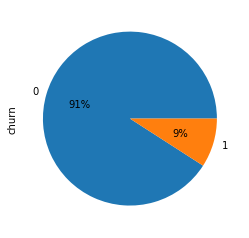

In [6]:
data.churn.value_counts().plot(kind='pie',subplots=True, autopct='%1.0f%%')

In [7]:
data.dtypes

age                                       int64
annualincome                              int64
calldroprate                            float64
callfailurerate                         float64
callingnum                                int64
customerid                                int64
customersuspended                        object
education                                object
gender                                   object
homeowner                                object
maritalstatus                            object
monthlybilledamount                       int64
noadditionallines                        object
numberofcomplaints                        int64
numberofmonthunpaid                       int64
numdayscontractequipmentplanexpiring      int64
occupation                               object
penaltytoswitch                           int64
state                                    object
totalminsusedinlastmonth                  int64
unpaidbalance                           

In [8]:
cols_drop = ['callingnum','year','noadditionallines','state','customersuspended']
target_col = 'churn'

cat_features = data.nunique()[data.nunique() < 12].keys().tolist()
cat_features_obj = data.select_dtypes(include='object').columns.tolist()
cat_features = list(set(cat_features_obj) | set(cat_features) - set(cols_drop))

num_features = [i for i in data.columns if i not in cat_features+cols_drop]

bin_features = data.nunique()[data.nunique() == 2].keys().tolist()
bin_features = [i for i in bin_features if i not in cols_drop] 
multi_features = [i for i in cat_features if i not in bin_features+cols_drop]

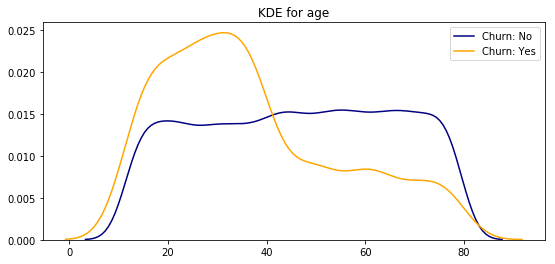

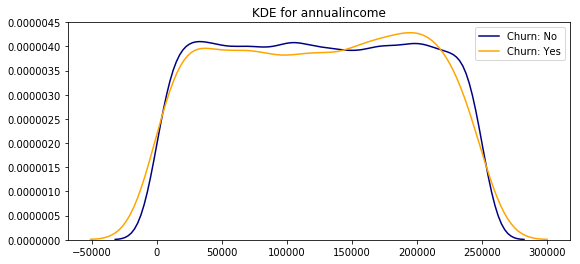

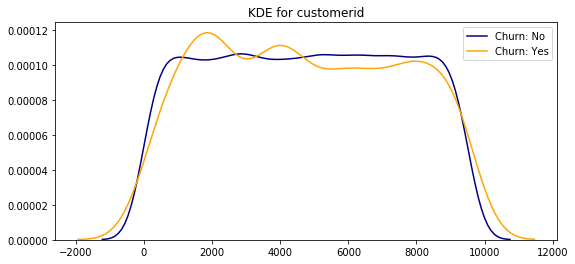

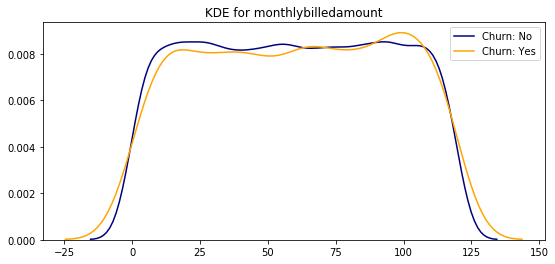

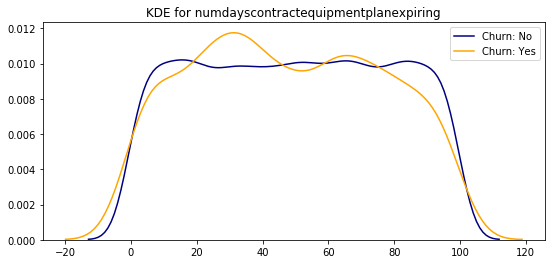

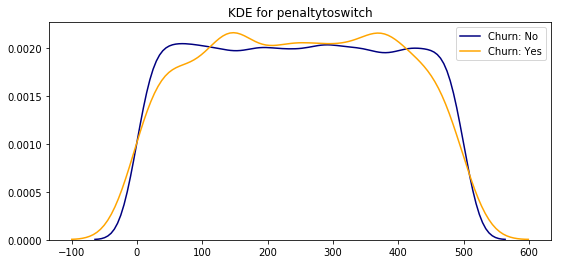

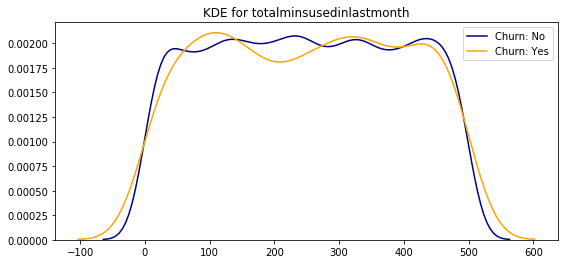

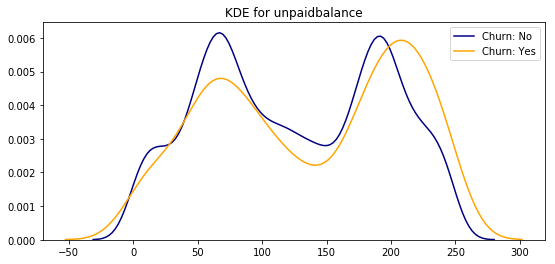

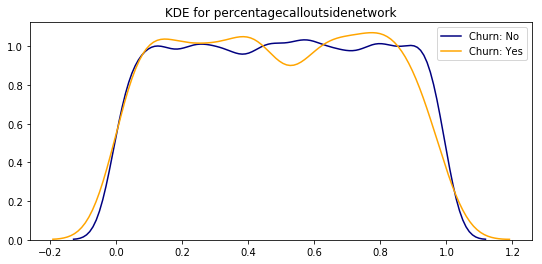

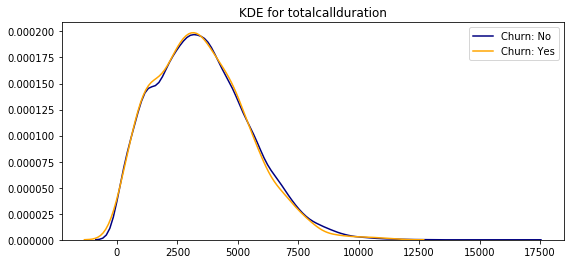

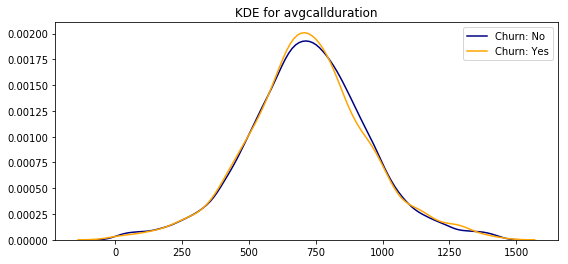

In [9]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['churn'] == 0][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn: Yes')

for name in num_features:
    kdeplot(name)

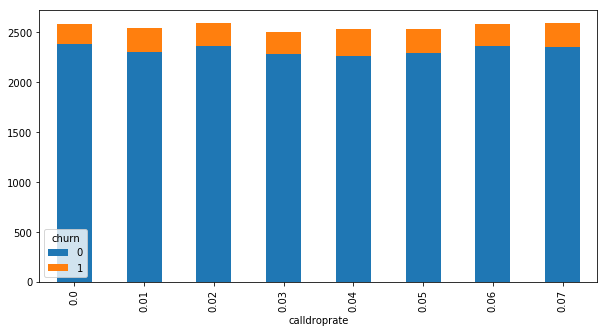

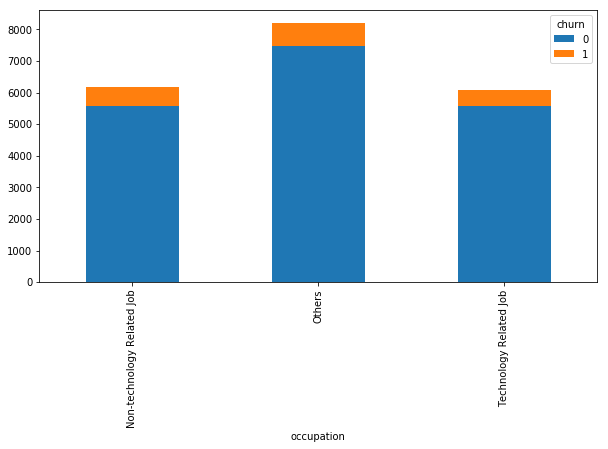

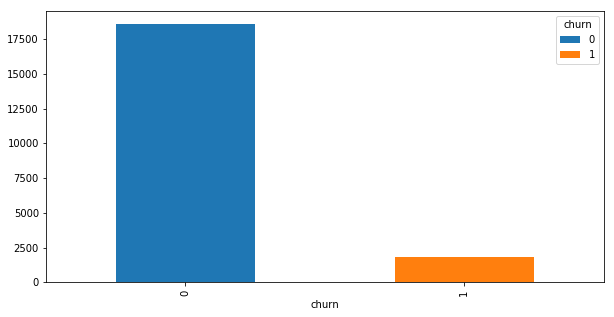

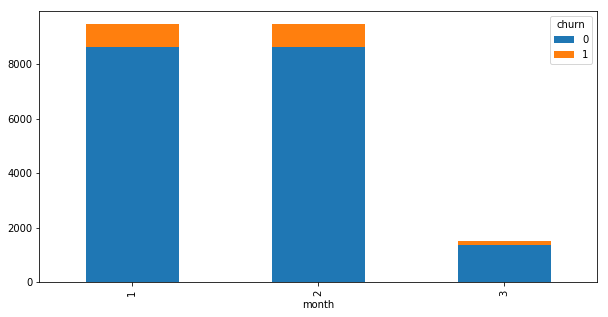

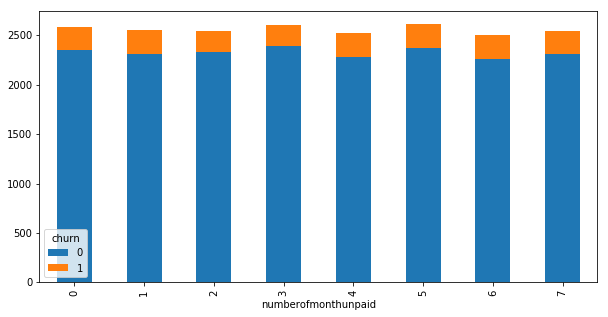

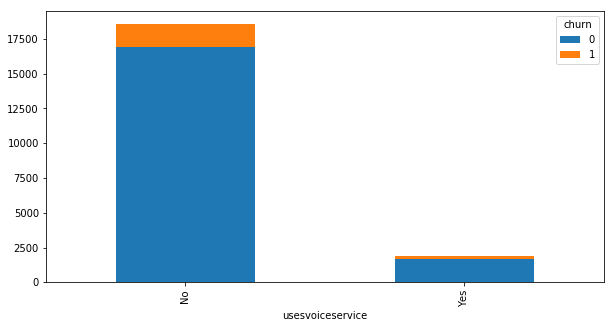

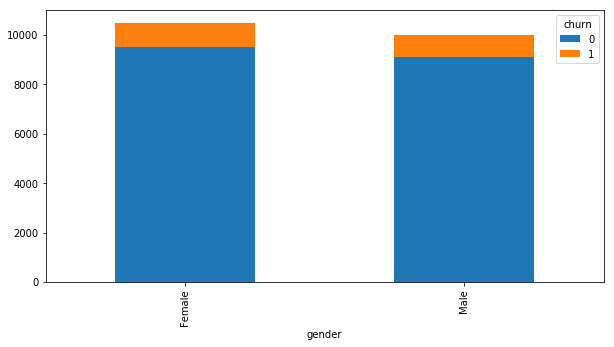

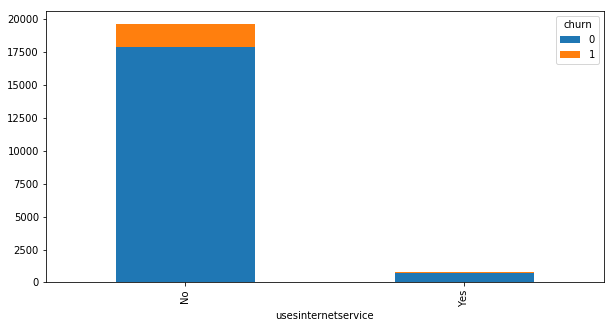

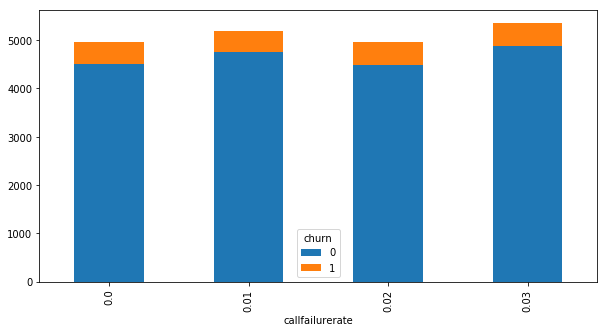

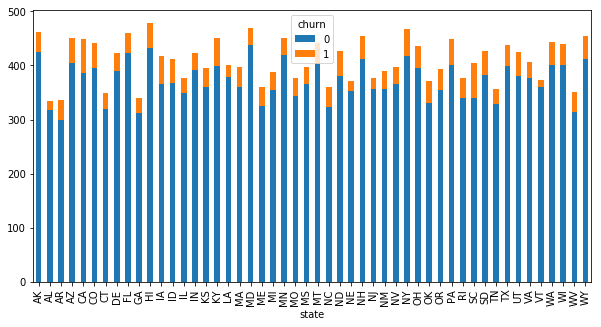

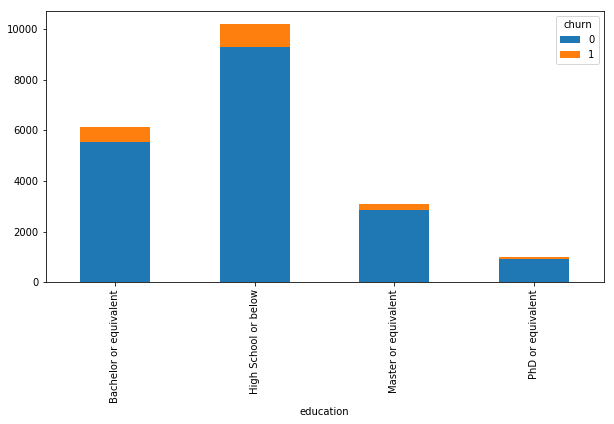

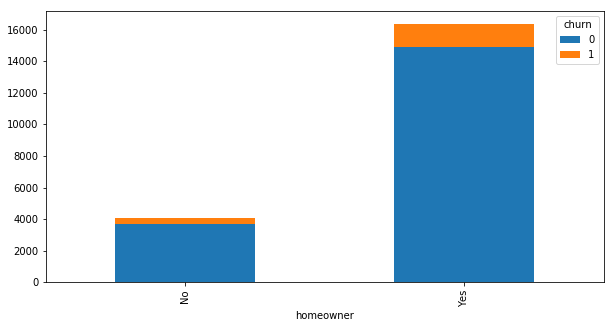

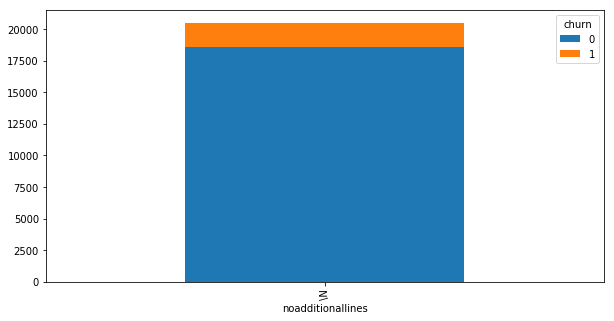

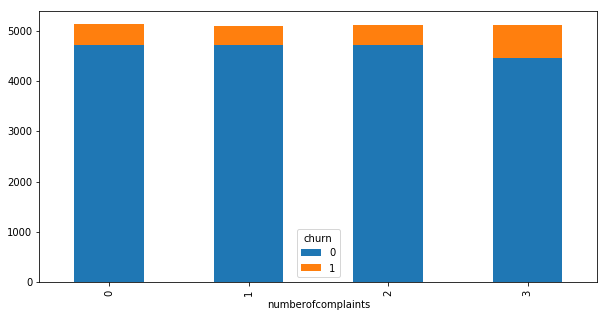

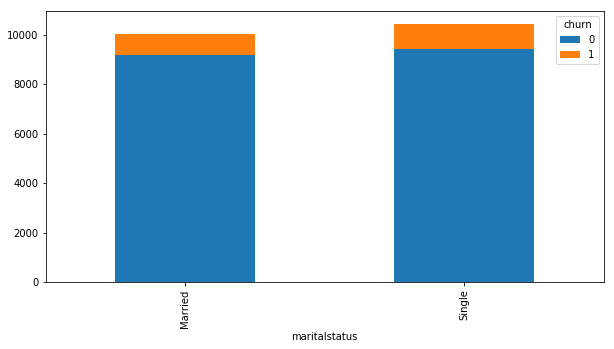

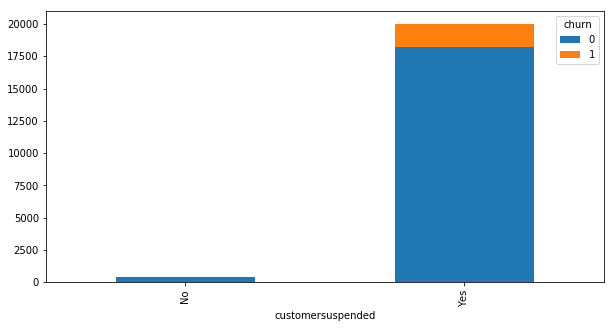

In [10]:
for name in cat_features:
    data.groupby([data[name], "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

#  Выводы из графиков:
- Удаляем год
- Больший отток среди молодых клиентов
- unpaidbalance ярковыраженные моды
- В основном отток среди клиентов, которые не используеют интернет и голосовые сервисы
- Среди домовладельцев отток больше
- Образование влияет на отток
- Большая часть фич не выделяет churn
- Часть фич удаляем (константы)

# Preprocessing

In [11]:
data.head(10)

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
0,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,5971,663,0,2015,1
1,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,3981,995,0,2015,2
2,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,212,34,No,Yes,0.27,7379,737,0,2015,1
3,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,212,34,No,Yes,0.27,1729,432,0,2015,2
4,58,27076,0.07,0.02,4251055773,3,Yes,Master or equivalent,Female,Yes,...,216,144,No,No,0.48,3122,624,0,2015,1
5,58,27076,0.07,0.02,4251055773,3,Yes,Master or equivalent,Female,Yes,...,216,144,No,No,0.48,2769,553,0,2015,2
6,20,137977,0.05,0.03,4251042488,4,Yes,PhD or equivalent,Male,No,...,412,159,Yes,No,0.94,834,834,0,2015,1
7,20,137977,0.05,0.03,4251042488,4,Yes,PhD or equivalent,Male,No,...,412,159,Yes,No,0.94,5868,838,0,2015,2
8,36,136006,0.07,0.00,4251073177,5,Yes,High School or below,Male,Yes,...,416,19,No,No,0.15,1886,628,0,2015,1
9,36,136006,0.07,0.00,4251073177,5,Yes,High School or below,Male,Yes,...,416,19,No,No,0.15,2602,867,0,2015,2


In [12]:
data = data.drop(cols_drop,axis=1)

In [13]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Label encoding Binary columns
le = LabelEncoder()
for name in bin_features :
    data[name] = le.fit_transform(data[name])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_features)

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_features])
scaled = pd.DataFrame(scaled,columns=num_features)

#dropping original values merging scaled values for numerical columns
df_telcom_og = data.copy()
data = data.drop(columns = num_features,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [14]:
data.head(10)

,gender,homeowner,maritalstatus,usesinternetservice,usesvoiceservice,churn,calldroprate_0.0,calldroprate_0.01,calldroprate_0.02,calldroprate_0.03,...,annualincome,customerid,monthlybilledamount,numdayscontractequipmentplanexpiring,penaltytoswitch,totalminsusedinlastmonth,unpaidbalance,percentagecalloutsidenetwork,totalcallduration,avgcallduration
0,1,1,1,0,0,0,0,0,0,0,...,0.605873,-1.729171,0.328114,1.615090,0.847229,-1.627943,-1.529954,1.122337,1.249903,-0.259319
1,1,1,1,0,0,0,0,0,0,0,...,0.605873,-1.729171,0.328114,1.615090,0.847229,-1.627943,-1.529954,1.122337,0.234387,1.211842
2,0,1,1,0,1,0,0,0,0,0,...,-1.322653,-1.728807,-1.489972,-1.224891,-1.426701,-0.261733,-1.316783,-0.785976,1.968419,0.068590
3,0,1,1,0,1,0,0,0,0,0,...,-1.322653,-1.728807,-1.489972,-1.224891,-1.426701,-0.261733,-1.316783,-0.785976,-0.914830,-1.282928
4,0,1,1,0,0,0,0,0,0,0,...,-1.349979,-1.728444,-1.259104,0.195099,1.069075,-0.233993,0.246470,-0.057347,-0.203969,-0.432136
5,0,1,1,0,0,0,0,0,0,0,...,-1.349979,-1.728444,-1.259104,0.195099,1.069075,-0.233993,0.246470,-0.057347,-0.384108,-0.746752
6,1,0,1,1,0,0,0,0,0,0,...,0.187587,-1.728080,0.414689,0.818510,-1.197921,1.125282,0.459641,1.538696,-1.371557,0.498418
7,1,0,1,1,0,0,0,0,0,0,...,0.187587,-1.728080,0.414689,0.818510,-1.197921,1.125282,0.459641,1.538696,1.197342,0.516142
8,1,1,0,0,0,0,0,0,0,0,...,0.160260,-1.727717,0.616699,-1.224891,1.297855,1.153022,-1.529954,-1.202335,-0.834712,-0.414411
9,1,1,0,0,0,0,0,0,0,0,...,0.160260,-1.727717,0.616699,-1.224891,1.297855,1.153022,-1.529954,-1.202335,-0.469330,0.644647


In [15]:
data = data.groupby("customerid",as_index=False).agg('mean')

In [16]:
data = data.drop('customerid',axis=1)

In [17]:
data.head()

,gender,homeowner,maritalstatus,usesinternetservice,usesvoiceservice,churn,calldroprate_0.0,calldroprate_0.01,calldroprate_0.02,calldroprate_0.03,...,age,annualincome,monthlybilledamount,numdayscontractequipmentplanexpiring,penaltytoswitch,totalminsusedinlastmonth,unpaidbalance,percentagecalloutsidenetwork,totalcallduration,avgcallduration
0,1,1,1,0,0,0,0.0,0.0,0.0,0.0,...,-1.698643,0.605873,0.328114,1.615090,0.847229,-1.627943,-1.529954,1.122337,0.742145,0.476262
1,0,1,1,0,1,0,0.0,0.0,0.0,0.0,...,-0.169910,-1.322653,-1.489972,-1.224891,-1.426701,-0.261733,-1.316783,-0.785976,0.526795,-0.607169
2,0,1,1,0,0,0,0.0,0.0,0.0,0.0,...,0.645414,-1.349979,-1.259104,0.195099,1.069075,-0.233993,0.246470,-0.057347,-0.294039,-0.589444
3,1,0,1,1,0,0,0.0,0.0,0.0,0.0,...,-1.290980,0.187587,0.414689,0.818510,-1.197921,1.125282,0.459641,1.538696,-0.087108,0.507280
4,1,1,0,0,0,0,0.0,0.0,0.0,0.0,...,-0.475656,0.160260,0.616699,-1.224891,1.297855,1.153022,-1.529954,-1.202335,-0.652021,0.115118


In [18]:
data.columns

Index(['gender', 'homeowner', 'maritalstatus', 'usesinternetservice',
       'usesvoiceservice', 'churn', 'calldroprate_0.0', 'calldroprate_0.01',
       'calldroprate_0.02', 'calldroprate_0.03', 'calldroprate_0.04',
       'calldroprate_0.05', 'calldroprate_0.06', 'calldroprate_0.07',
       'occupation_Non-technology Related Job', 'occupation_Others',
       'occupation_Technology Related Job', 'month_1', 'month_2', 'month_3',
       'numberofmonthunpaid_0', 'numberofmonthunpaid_1',
       'numberofmonthunpaid_2', 'numberofmonthunpaid_3',
       'numberofmonthunpaid_4', 'numberofmonthunpaid_5',
       'numberofmonthunpaid_6', 'numberofmonthunpaid_7', 'callfailurerate_0.0',
       'callfailurerate_0.01', 'callfailurerate_0.02', 'callfailurerate_0.03',
       'education_Bachelor or equivalent', 'education_High School or below',
       'education_Master or equivalent', 'education_PhD or equivalent',
       'numberofcomplaints_0', 'numberofcomplaints_1', 'numberofcomplaints_2',
       'n

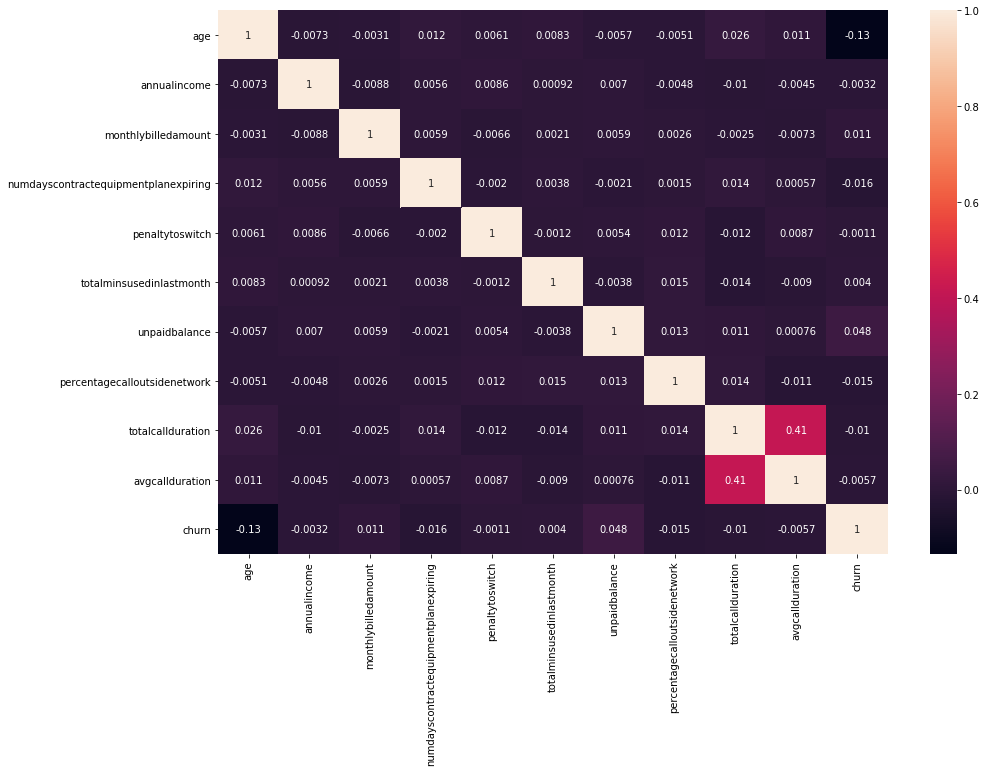

In [23]:
plt.figure(figsize=(15,10))
# num_features.remove('customerid')
sns.heatmap(data[num_features+['churn']].corr(method='spearman'), annot=True)

Есть не существенная отрицательная корреляция возраста с таргетом, остальные корреляции не существенны.

# Visualization

Explained variation per principal component: [0.07190399 0.07174369]


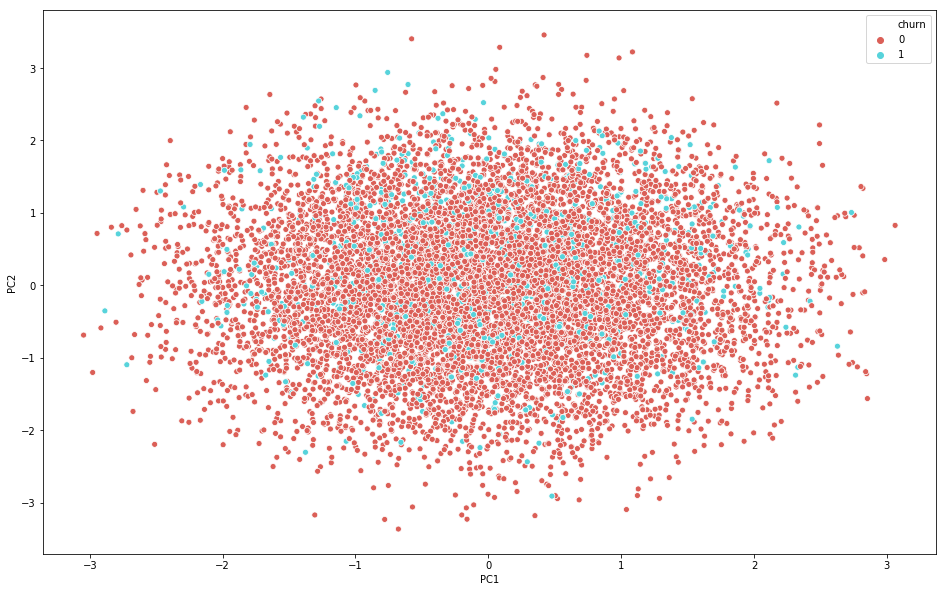

In [20]:
from sklearn.decomposition import PCA

X = data[[i for i in data.columns if i not in [target_col]]]
y = data[target_col]

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca_df = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_df['churn'] = y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="churn",
    palette=sns.color_palette("hls", 2),
    data=pca_df,
    legend="full",
    alpha=1.)


Очень малая доля объясненной дисперсии на компонентах, и не видно паттернов

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 9525 samples in 0.047s...
[t-SNE] Computed neighbors for 9525 samples in 20.061s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9525
[t-SNE] Computed conditional probabilities for sample 2000 / 9525
[t-SNE] Computed conditional probabilities for sample 3000 / 9525
[t-SNE] Computed conditional probabilities for sample 4000 / 9525
[t-SNE] Computed conditional probabilities for sample 5000 / 9525
[t-SNE] Computed conditional probabilities for sample 6000 / 9525
[t-SNE] Computed conditional probabilities for sample 7000 / 9525
[t-SNE] Computed conditional probabilities for sample 8000 / 9525
[t-SNE] Computed conditional probabilities for sample 9000 / 9525
[t-SNE] Computed conditional probabilities for sample 9525 / 9525
[t-SNE] Mean sigma: 0.761098
[t-SNE] KL divergence after 50 iterations with early exaggeration: 117.854301
[t-SNE] KL divergence after 500 iterations: 4.117539


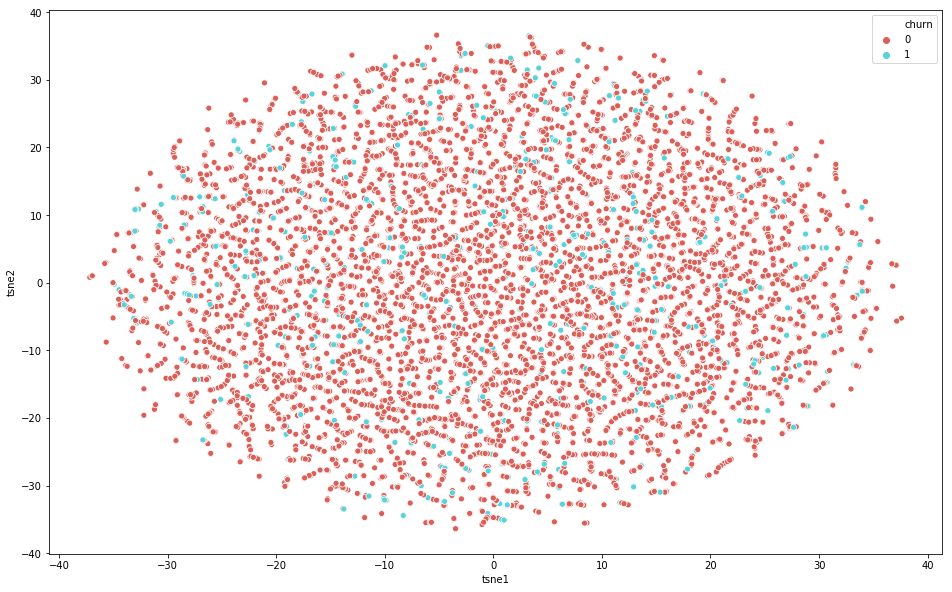

In [21]:
from sklearn.manifold import TSNE


X = data[[i for i in data.columns if i not in [target_col]]]
y = data[target_col]

tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=5,
            n_iter=500,
            learning_rate=30)
tsne_results = tsne.fit_transform(X)

df = pd.DataFrame(tsne_results,columns = ["tsne1","tsne2"])
df['churn'] = y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="churn",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=1.)

Попробовал найти нелинейные связи в данных, но не увенчалось успехом.

# Build models

In [ ]:
X = data[[i for i in data.columns if i not in [target_col]]]
y = data[target_col]

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer,precision_recall_curve
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
import random

# Undersampling 

In [195]:
all_indexes_zeros = np.where(y == 0)[0]
all_indexes_ones = list(np.where(y == 1)[0])
indexes_zeros = random.sample(list(all_indexes_zeros), 900)
indexes = indexes_zeros+all_indexes_ones
X = X.iloc[indexes,:]
y = y.iloc[indexes]

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.15,random_state=111,shuffle=True)

In [199]:
y_test.value_counts()

1    134
0    131
Name: churn, dtype: int64

In [200]:
import plotly.tools as tls

def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot,threshold=None,custom_edge_tpr=None) : 
    """
    Function to predict for common interface algorithm.
    
    """
   
    #coeffs
    if   cf == "coefficients" :
        algorithm.fit(training_x,training_y)
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        algorithm.fit(training_x,training_y,
#                       eval_set=[(testing_x,testing_y)],
#                       eval_metric="auc", 
#                       early_stopping_rounds=30
                     )
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
      
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
        
    if custom_edge_tpr:
        index_threshold = np.where(tpr > custom_edge_tpr)[0][0]
        print(index_threshold)
        threshold = thresholds[index_threshold]
    print(threshold)
    plt.figure()
    plt.title('Confusion Matrix')
    sns.heatmap(conf_matrix, annot=True)
    
    # for new threshold
    if threshold:
        y_classes = [1 if value > threshold else 0 for value in probabilities[:,1]]
        print(f'For THRESHOLD {threshold}:')
        model_roc_auc = roc_auc_score(testing_y,y_classes) 
        print ("Area under curve : ",model_roc_auc,"\n")
        print ("\n Classification report : \n",classification_report(testing_y,y_classes))
        conf_matrix = confusion_matrix(testing_y,y_classes)
        plt.figure()
        plt.title(f'Confusion Matrix for THRESHOLD {threshold}')
        sns.heatmap(conf_matrix, annot=True)
    
    # charts
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.fill_between(fpr,tpr,alpha = .8)
    recall,precision,thresholds = precision_recall_curve(testing_y,probabilities[:,1])
    
    plt.figure()
    lw = 2
    plt.plot(recall, precision, color='darkorange',linewidth = 1.5,)
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Recall-Precision')
    plt.legend(loc="lower right")
    plt.fill_between(recall,precision,alpha = .8)
    
    plt.figure()
    sns.barplot(x = coef_sumry["features"],y = coef_sumry["coefficients"])
    plt.xticks(rotation='vertical')
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.58      0.66      0.62       131
           1       0.61      0.52      0.56       134

    accuracy                           0.59       265
   macro avg       0.60      0.59      0.59       265
weighted avg       0.60      0.59      0.59       265

Accuracy   Score :  0.5924528301886792
Area under curve :  0.5932550985530363 

None


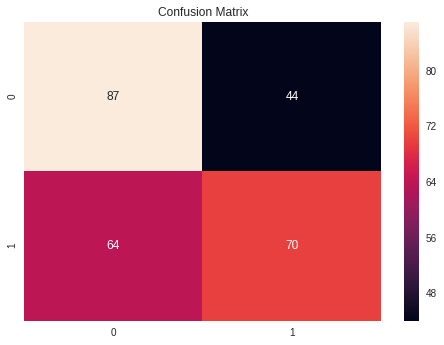

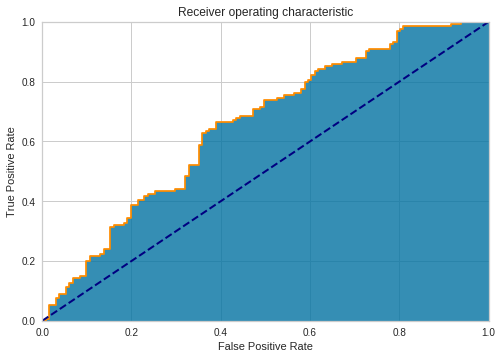

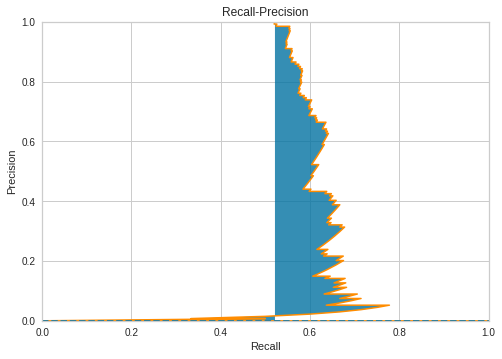

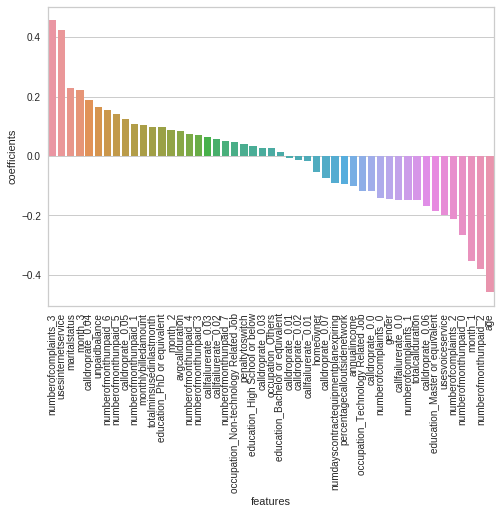

In [201]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

cols = X.columns.tolist()

telecom_churn_prediction(logit,X_train,X_test,y_train,y_test,
                         cols,"coefficients",threshold_plot = True)

Для этой задачи имеет смысл искать максимальный recall и precision, который пока что очень плохой, как и все кривые , следовательно, порог не имеет смысла менять.

Также в этой задаче нам не хочется тратить ресурсы на клиентов, которые не собираются уходить, так и не хочется упустить клиента, поэтому нужно смотреть матрицу ошибок и максимизировать обе метрики, или f-score.   

Accuracy здесь бесполезен.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.59      0.66      0.62       131
           1       0.62      0.56      0.59       134

    accuracy                           0.61       265
   macro avg       0.61      0.61      0.61       265
weighted avg       0.61      0.61      0.61       265

Accuracy   Score :  0.6075471698113207
Area under curve :  0.608095021077817 

None


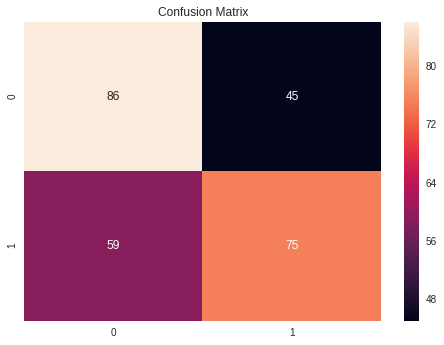

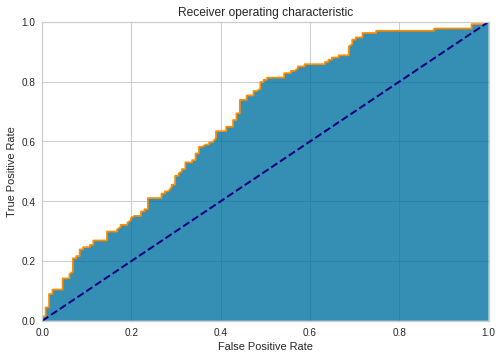

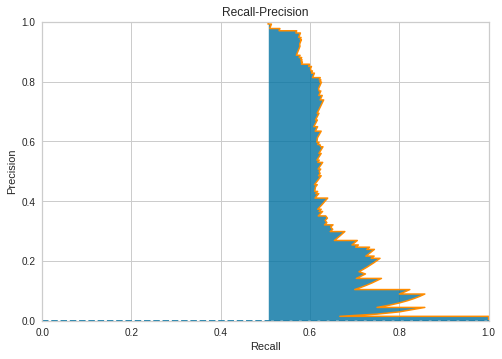

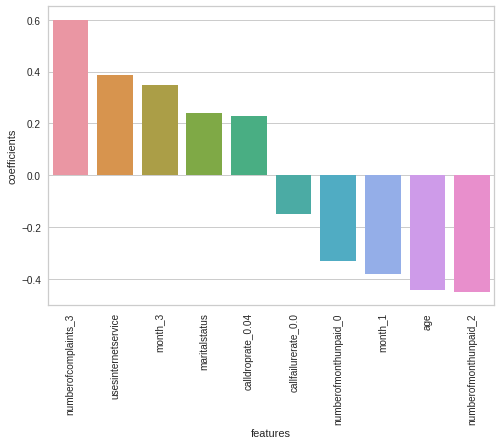

In [202]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(X_train,y_train)

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : X.columns.tolist(),
                       "ranking" : rfe.ranking_,
                      })
cols_rfe = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rf_X = X_train[cols_rfe]
train_rf_y = y_train
test_rf_X  = X_test[cols_rfe]
test_rf_y  = y_test

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_y,test_rf_y,
                         cols_rfe,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

# XGBoost

XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1.0,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.4,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.9, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.63      0.61      0.62       131
           1       0.63      0.66      0.64       134

    accuracy                           0.63       265
   macro avg       0.63      0.63      0.63       265
weighted avg       0.63      0.63      0.63       265

Accuracy   Score :  0.6339622641509434
Area under curve :  0.6337017204056057 

73
0.2667077
For THRESHOLD 0.2667076885700226:
Area under curve :  0.655320724621169 



No handles with labels found to put in legend.
No handles with labels found to put in legend.


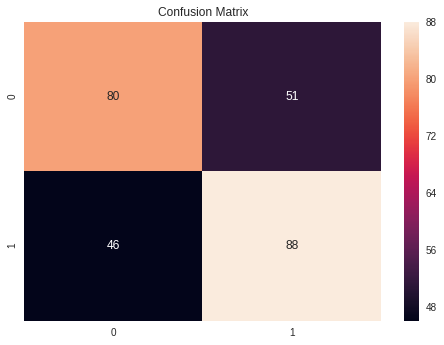

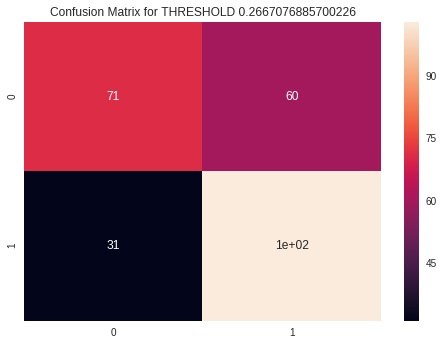

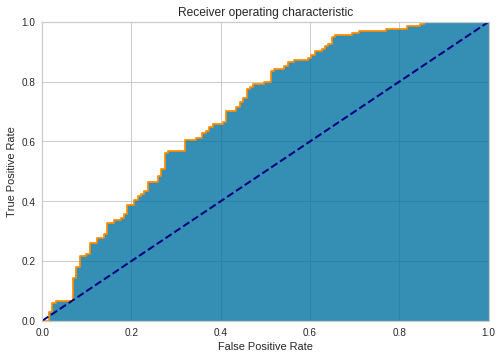

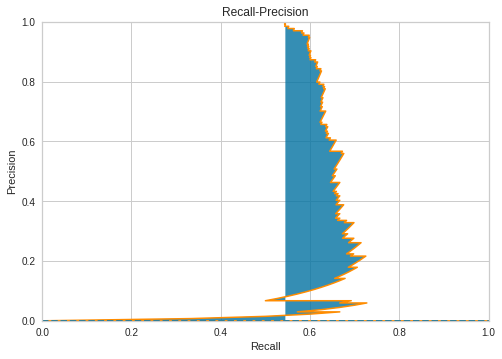

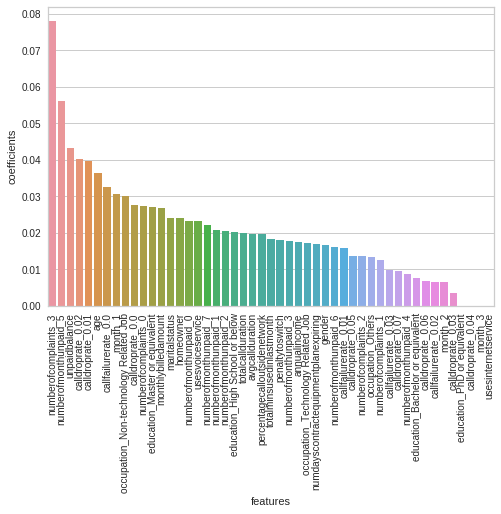

In [220]:
from xgboost import XGBClassifier


xgc = XGBClassifier(base_score=0.7,
                    subsample=0.9,
                    booster='gbtree',
                    colsample_bylevel=1.,
                    colsample_bytree=1.,
                    gamma=0.4,
                    learning_rate=0.9,
                    max_delta_step=0,
                    max_depth=7,
                    min_child_weight=2,
                    n_estimators=1000,
                    n_jobs=-1,
                    nthread=-1,
                    objective='binary:logistic',
                    random_state=0,
                    reg_alpha=0,
                    reg_lambda=1,
                    scale_pos_weight=1,
                    silent=True,
                   )

cols = X_train.columns.tolist()
telecom_churn_prediction(xgc,X_train,X_test,y_train,y_test,
                         cols,"features",threshold_plot = True,custom_edge_tpr=0.75)

# LightGBM
Быстрая модель, с небольшими отличиями от XGBOOST

No handles with labels found to put in legend.
No handles with labels found to put in legend.


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=8,
               min_child_samples=2, min_child_weight=10, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=1000,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=0.8,
               subsample_for_bin=100, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.62      0.60      0.61       131
           1       0.62      0.64      0.63       134

    accuracy                           0.62       265
   macro avg       0.62      0.62      0.62       265
weighted avg       0.62      0.62      0.62       265

Accuracy   Score :  0.6226415094339622
Area under curve :  0.6224222399453115 

88
0.3727953605686736
For THRESHOLD 0.3727953605686736:
Area under curve :  0.61419049789221

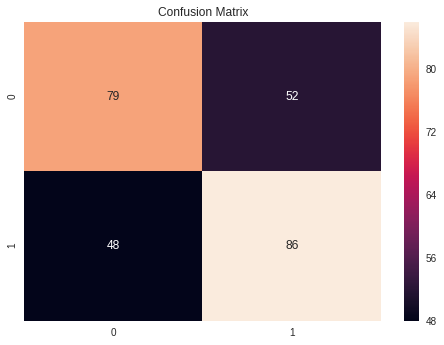

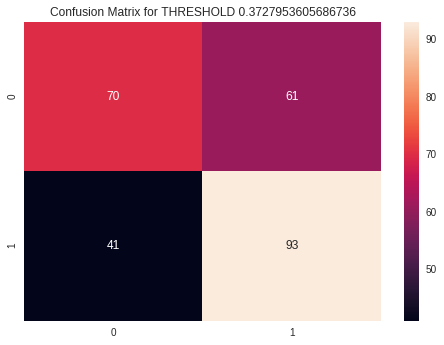

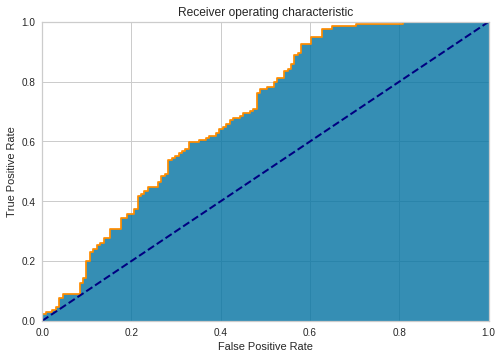

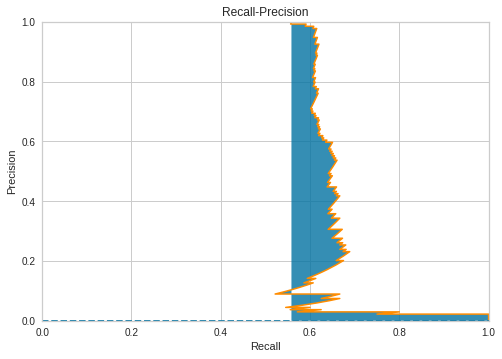

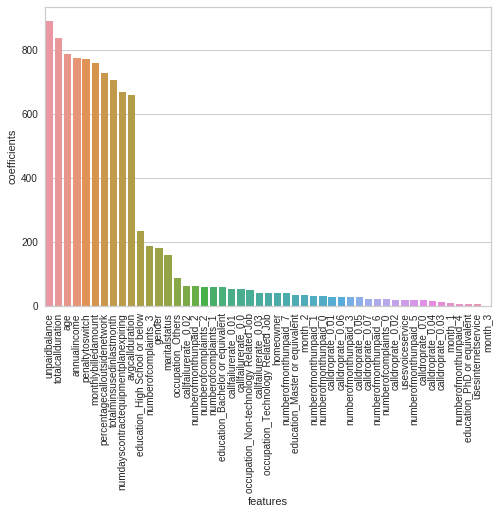

In [218]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.1, max_depth=8, min_child_samples=2,
                        min_child_weight=10, min_split_gain=0.0, n_estimators=1000,
                        n_jobs=-1, num_leaves=1000, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=.8,
                        subsample_for_bin=100, subsample_freq=0)

cols = X_train.columns.tolist()
telecom_churn_prediction(lgbm_c,X_train,X_test,y_train,y_test,
                         cols,"features",threshold_plot = True,custom_edge_tpr=0.7)

## Support Vector Machine


No handles with labels found to put in legend.
No handles with labels found to put in legend.


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       226
           1       0.00      0.00      0.00       129

    accuracy                           0.64       355
   macro avg       0.32      0.50      0.39       355
weighted avg       0.41      0.64      0.50       355

Accuracy   Score :  0.6366197183098592
Area under curve :  0.5 

None


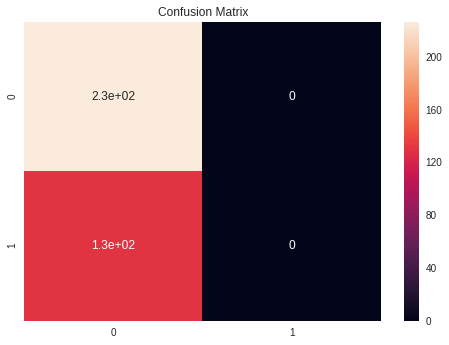

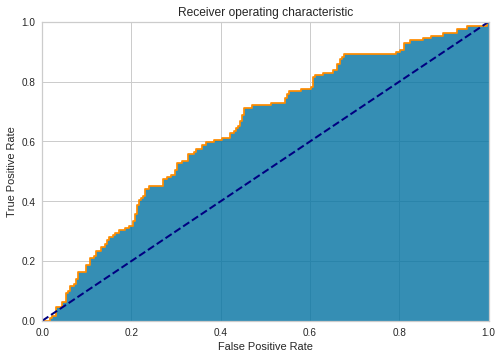

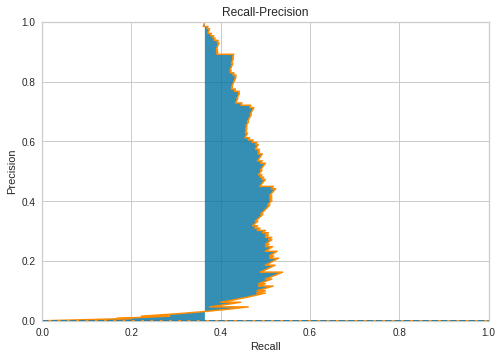

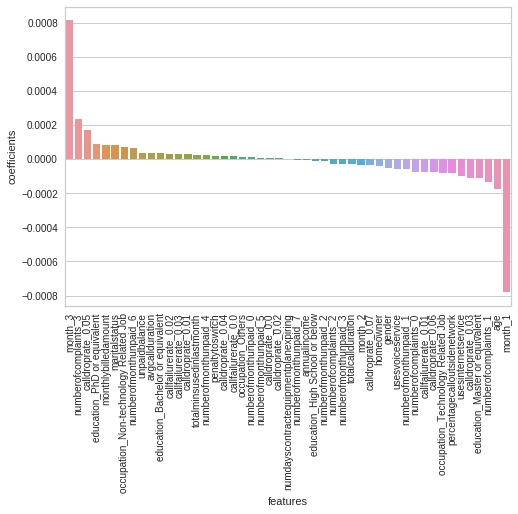

In [176]:
from sklearn.svm import SVC

svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = X_train.columns.tolist()
telecom_churn_prediction(svc_lin,X_train,X_test,y_train,y_test,
                         cols,"coefficients",threshold_plot = False)

In [ ]:
print(f"X_train size: {X_train.shape}")
print(f"y_train size: {y_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_test size: {y_test.shape}")

# Catboost 

Совсем иная реализация от яндекса, которая применяет ордеринг, что может помочь, и сильно кодирует категориальные фичи.

No handles with labels found to put in legend.
No handles with labels found to put in legend.



 Classification report : 
               precision    recall  f1-score   support

           0       0.61      0.66      0.63       131
           1       0.64      0.60      0.62       134

    accuracy                           0.63       265
   macro avg       0.63      0.63      0.63       265
weighted avg       0.63      0.63      0.63       265

Accuracy   Score :  0.6264150943396226
Area under curve :  0.6267517374957274 

72
0.3500112728751297
For THRESHOLD 0.3500112728751297:
Area under curve :  0.6218240856784778 


 Classification report : 
               precision    recall  f1-score   support

           0       0.64      0.55      0.59       131
           1       0.61      0.69      0.65       134

    accuracy                           0.62       265
   macro avg       0.62      0.62      0.62       265
weighted avg       0.62      0.62      0.62       265



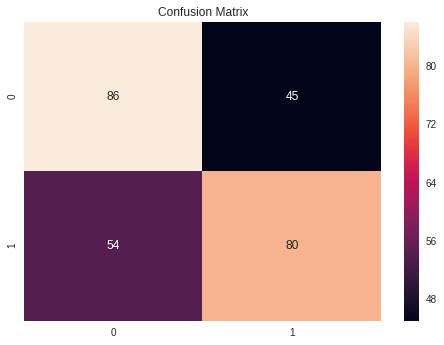

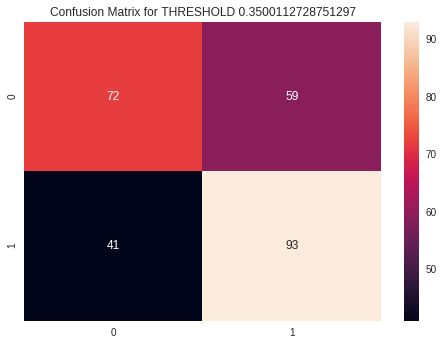

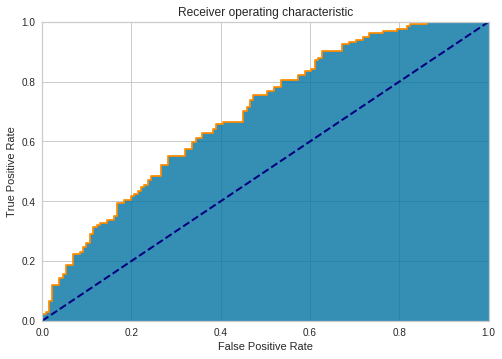

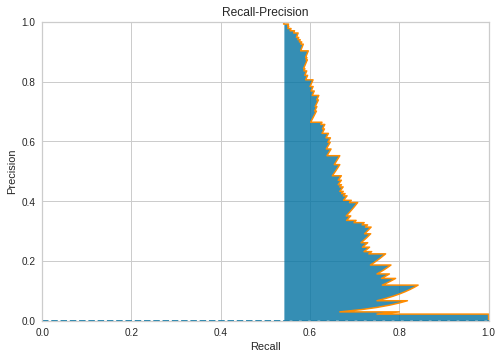

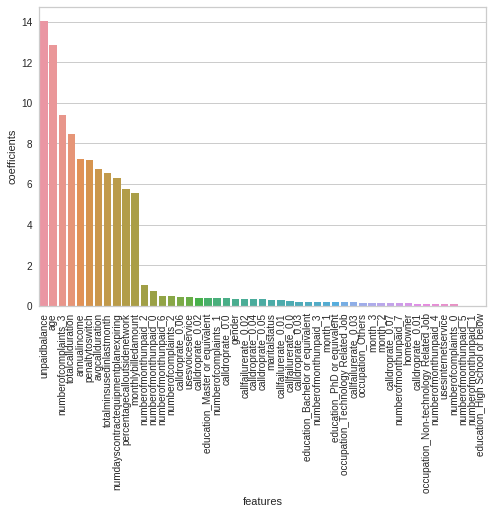

In [219]:
from catboost import CatBoostClassifier, Pool
params = {
    'iterations': 1000,
    'bagging_temperature':1.,
    'depth':7,
    'learning_rate':.2,
    'loss_function':'Logloss',
    'verbose':False,
    'train_dir':'crossentropy',
    'one_hot_max_size':10
}
catboost = CatBoostClassifier(**params)

cols = X_train.columns.tolist()

telecom_churn_prediction(catboost,X_train,X_test,y_train,y_test,
                         cols,"features",threshold_plot = True,custom_edge_tpr=0.7)

In [ ]:
# возможно улучшило бы немного, но у меня нестыковка библиотек, поэтому не сработало, не стал возиться
# трэйн часть можно было бы оверсемплили по ближайшим соседям

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)



# Отчет

!!! Использовать в продакшене нельзя, ошибаемся сильно как по 1 так и по 0.

1. Если обучать на исходных данных без группировки, смысл примерно тот же, не удается добится хорошого скоро по обоим классам.

2. С группировкой выглядет адекватно, так как многие фичи накапливаются и можно определить уровень накопления.

3. Всем модели плохи, разве что удалось чуть лучше настроить xgboost. Возможно, если потратить время больше, можно еще улучшить метрики.